In [13]:
%matplotlib inline
import numpy as np
from sympy.solvers import solve
from sympy import Symbol
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import uniform
from numpy import random
%config InlineBackend.figure_formats = {'png', 'retina'}

# A demonstration of how a Gradient Descent algorithm works:

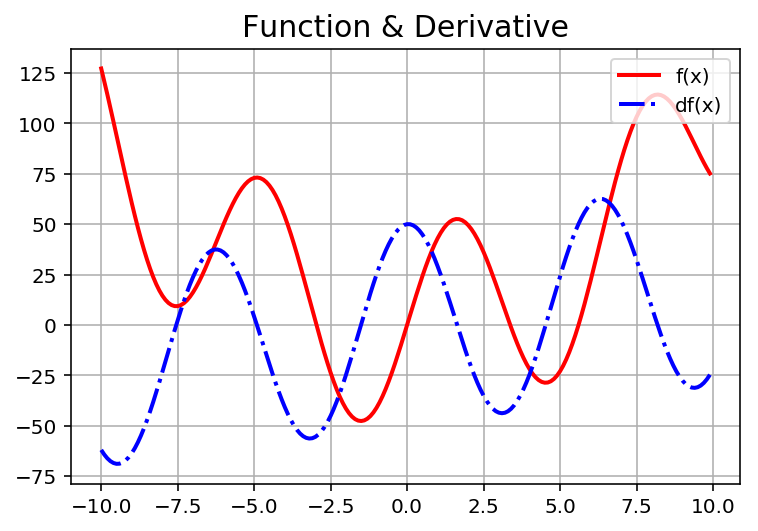

In [14]:
def func(t):
    return 50 * np.sin(t) + t**2
def dfunc(t):
    return 50 * np.cos(t) + 2*t

t=np.arange(-10.,10., 0.1)
plt.plot(t, func(t), 'r-', linewidth=2, label='f(x)')
plt.plot(t, dfunc(t), 'b-.', linewidth=2, label='df(x)')
plt.grid(True)
plt.title('Function & Derivative', fontsize=15)
plt.legend(loc='upper right')

## We can play around with 'c' values to see how changing the learning rate doesn't give us the minimum using gradient descent algorithm:

Minimum = -1.509843696723778


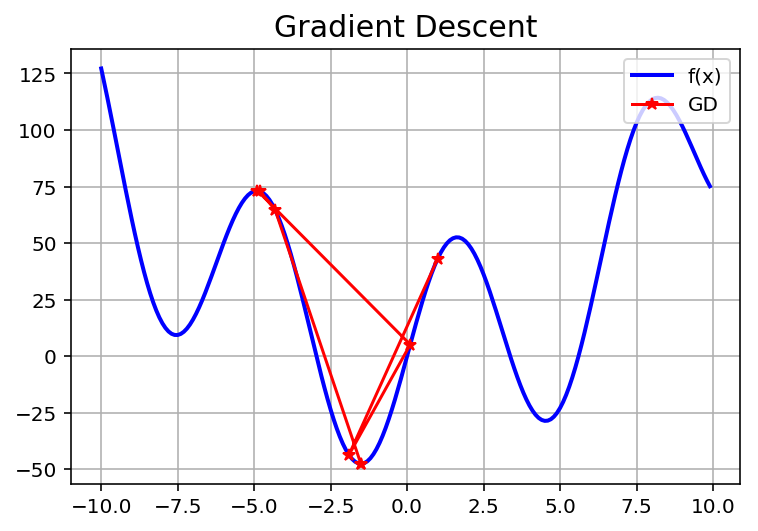

In [15]:
c=0.1
epsilon=0.01
x0=1.0

x=[]
x.append(x0)

finish=0
i=0
while finish==0:
    x.append(x[i]-c*dfunc(x[i]))  
    if np.abs(x[i+1]-x[i]) < epsilon:
        finish=1        
    i+=1

x=np.array(x)
t=np.arange(-10.,10., 0.1)
plt.plot(t, func(t), 'b-', linewidth=2, label='f(x)')
plt.plot(x, func(x),'r*-', label='GD')
plt.title('Gradient Descent', fontsize=15)
plt.grid(True)
plt.legend(loc='upper right')
print('Minimum =', x[-1])


# Perceptron
## Implemented for AND gate inputs: (x,y) --> z
## The code outputs the final weight matrix to accurately classify the 2D inputs based on its value (0 or 1).

In [16]:
inputt = 2 
w = np.random.random(inputt+1)   # generate the initial weight vector
x = np.array([[0, 0],  [0, 1],  [1, 0],  [1, 1]]) # the training set (or the inputs)
tr=len(x)
T = np.array([0,  0,  0,  1])                     # the expected output
z = np.zeros_like(T)
print('The initial weight matrix', w)

# learning process (training process)
finish = 0 
while finish==0:
    j=0
    for i in range(tr):
        z[i] = int(np.matmul(w[:inputt].reshape(1,2),x[i,:].reshape(2,1)) >= w[inputt])
        w[:inputt] = w[:inputt] + (T[i]-z[i])* x[i,:] 
        w[inputt] = w[inputt] - (T[i]-z[i]) 
    if np.sum(np.abs(z-T)) == 0:
        finish = 1 

print('The final weight matrix', w)

The initial weight matrix [0.45388459 0.1835461  0.13955147]
The final weight matrix [2.45388459 1.1835461  3.13955147]


## Similar one for OR gate

In [17]:
inputt = 2 
w = np.random.random(inputt+1)                    # generate the initial weight vector
x = np.array([[0, 0],  [0, 1],  [1, 0],  [1, 1]]) # the training set (or the inputs)
tr=len(x) 
T = np.array([0,  1,  1,  1])                     # the expected output
z = np.zeros_like(T)
print('The initial weight matrix', w)

# learning process (training process)
finish = 0 
iteration=0
while finish==0:
    for i in range(tr):
        z[i] = int(np.matmul(w[:inputt].reshape(1,2),x[i,:].reshape(2,1)) >= w[inputt])
        w[:inputt] = w[:inputt] + (T[i]-z[i])* x[i,:] 
        w[inputt] = w[inputt] - (T[i]-z[i]) 
        print('The new weight matrix online', w)
    print('The new weight matrix after a batch', w)
    
    if np.sum(np.abs(z-T)) == 0:
        finish = 1    

    iteration+=1
    if iteration >= 10:
        break
print('The final weight matrix', w)


The initial weight matrix [0.53983734 0.16928482 0.50101749]
The new weight matrix online [0.53983734 0.16928482 0.50101749]
The new weight matrix online [ 0.53983734  1.16928482 -0.49898251]
The new weight matrix online [ 0.53983734  1.16928482 -0.49898251]
The new weight matrix online [ 0.53983734  1.16928482 -0.49898251]
The new weight matrix after a batch [ 0.53983734  1.16928482 -0.49898251]
The new weight matrix online [0.53983734 1.16928482 0.50101749]
The new weight matrix online [0.53983734 1.16928482 0.50101749]
The new weight matrix online [0.53983734 1.16928482 0.50101749]
The new weight matrix online [0.53983734 1.16928482 0.50101749]
The new weight matrix after a batch [0.53983734 1.16928482 0.50101749]
The new weight matrix online [0.53983734 1.16928482 0.50101749]
The new weight matrix online [0.53983734 1.16928482 0.50101749]
The new weight matrix online [0.53983734 1.16928482 0.50101749]
The new weight matrix online [0.53983734 1.16928482 0.50101749]
The new weight ma

## Similar one for XOR gate. This is a special case because the ouptut to XOR gate is linearly non-separable in 2D (x,y) space. Therefore, we can observe the failure of the perceptron in classifying the inputs.

In [18]:
inputt = 2 
w = np.random.random(inputt+1)                    # generate the initial weight vector
x = np.array([[0, 0],  [0, 1],  [1, 0],  [1, 1]]) # the training set (or the inputs)
tr=len(x) 
T = np.array([0,  1,  1,  0])                     # the expected output
z = np.zeros_like(T)
print('The initial weight matrix', w)

# learning process (training process)
finish = 0 
iteration=0
while finish==0:
    for i in range(tr):
        z[i] = int(np.matmul(w[:inputt].reshape(1,2),x[i,:].reshape(2,1)) >= w[inputt])
        w[:inputt] = w[:inputt] + (T[i]-z[i])* x[i,:] 
        w[inputt] = w[inputt] - (T[i]-z[i]) 
        print('The new weight matrix online', w)
    print('The new weight matrix after a batch', w)
    
    if np.sum(np.abs(z-T)) == 0:
        finish = 1    

    iteration+=1
    if iteration >= 10:
        break
print('The final weight matrix', w)


The initial weight matrix [0.41398298 0.17668033 0.88719161]
The new weight matrix online [0.41398298 0.17668033 0.88719161]
The new weight matrix online [ 0.41398298  1.17668033 -0.11280839]
The new weight matrix online [ 0.41398298  1.17668033 -0.11280839]
The new weight matrix online [-0.58601702  0.17668033  0.88719161]
The new weight matrix after a batch [-0.58601702  0.17668033  0.88719161]
The new weight matrix online [-0.58601702  0.17668033  0.88719161]
The new weight matrix online [-0.58601702  1.17668033 -0.11280839]
The new weight matrix online [ 0.41398298  1.17668033 -1.11280839]
The new weight matrix online [-0.58601702  0.17668033 -0.11280839]
The new weight matrix after a batch [-0.58601702  0.17668033 -0.11280839]
The new weight matrix online [-0.58601702  0.17668033  0.88719161]
The new weight matrix online [-0.58601702  1.17668033 -0.11280839]
The new weight matrix online [ 0.41398298  1.17668033 -1.11280839]
The new weight matrix online [-0.58601702  0.17668033 -0.

# Comparison of classificaton using FLD reduced data, PCA reduced data, and Perceptron. The input is given to an AND gate

##  3.1 Decision Boundary for unreduced data

In [31]:
X = np.array([[0, 0],  [0, 1],  [1, 0],  [1, 1]]) # Training data
Xtype = np.array([0,  0,  0,  1])                 # Labels

classwise=np.insert(X, 2, Xtype, axis=1)#, axis=0) # Adding the type to the distance
classwise=pd.DataFrame(classwise)
classwise.rename(columns={0:"X1", 1:"X2", 2:"type"}, inplace=True)

X0=np.array(classwise[classwise['type']==0].drop(columns='type')) # Class separated, for FLD and kNN
X1=np.array(classwise[classwise['type']==1].drop(columns='type')) # Class separated, for FLD and kNN

def EstGauss(data):
    mu=np.mean(data, axis=0)
    m,n=data.shape
    sigma=np.zeros((n,n))
    
    for i in range(m):
        sigma = sigma + (data[i] - mu).reshape(n,1).dot((data[i] - mu).reshape(1,n))
        
    sigma=sigma*(1.0/m)
    
    return mu, sigma


mu0,sigma0=EstGauss(X0)
mu1,sigma1=EstGauss(X1)

sig=(sigma0[0,0]+sigma1[1,1])/2.0
sigma=sig*(np.identity(2, dtype=float))
sigmadet=np.linalg.det(sigma)
sigmainv=np.linalg.inv(sigma)


# Solving for the Decision Boundary in Case-1 
x=Symbol('x')
y=Symbol('y')
zz=np.array([x,y])
z=zz.reshape(1,2)

Prior=0.5
g00=-0.5*(z-mu0).reshape(1,2).dot(sigmainv).dot((z-mu0).reshape(2,1))-0.5*np.log(sigmadet)+np.log(Prior)
g11=-0.5*(z-mu1).reshape(1,2).dot(sigmainv).dot((z-mu1).reshape(2,1))-0.5*np.log(sigmadet)+np.log(Prior)

DB1=solve(g00[0][0]-g11[0][0], y)

print('The linear equation for the decision boundary in case-1:\ny='+str(DB1[0])+'\n\n')

The linear equation for the decision boundary in case-1:
y=-x + 1.33333333333333




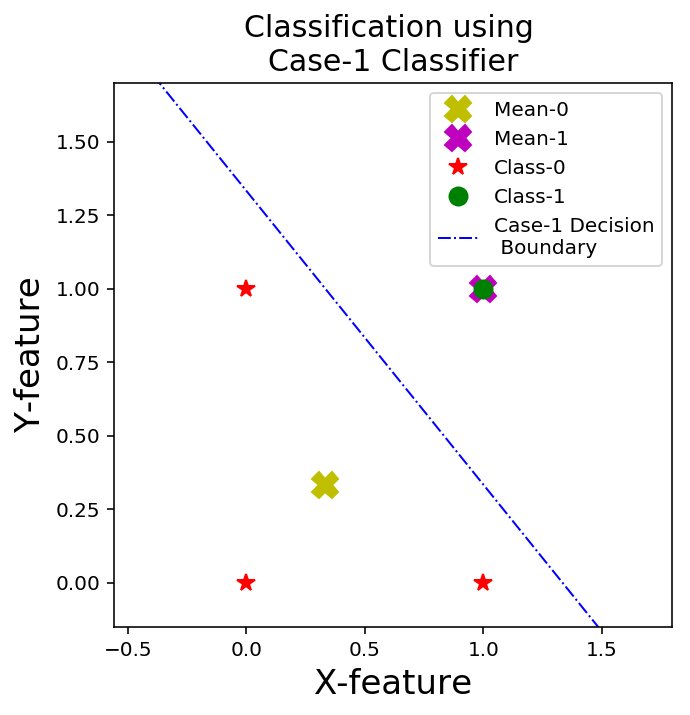

In [32]:
x0=X0.transpose()[0]
y0=X0.transpose()[1]
x1=X1.transpose()[0]
y1=X1.transpose()[1]

plt.figure(figsize=(5,5))

plt.plot(mu0[0],mu0[1],'yX',label='Mean-0', markersize=13)
plt.plot(mu1[0],mu1[1],'mX',label='Mean-1', markersize=13)

plt.plot(x0,y0,'r*',label='Class-0', markersize=9)
plt.plot(x1,y1,'go',label='Class-1', markersize=9)

xplot=np.arange(-0.45, 1.7, 0.01)
plt.plot(xplot, -xplot + 1.3333, 'b-.', linewidth=1, label='Case-1 Decision\n Boundary')

plt.xlabel('X-feature', fontsize=17)
plt.ylabel('Y-feature', fontsize=17)
plt.ylim(-0.15,1.7)
plt.title('Classification using \nCase-1 Classifier', fontsize=15)
plt.legend(loc='upper right')
plt.show()

## 3.2 FLD

In [33]:
X = np.array([[0, 0],  [0, 1],  [1, 0],  [1, 1]]) # Training data
Xtype = np.array([0,  0,  0,  1])                 # Labels

classwise=np.insert(X, 2, Xtype, axis=1)#, axis=0) # Adding the type to the distance
classwise=pd.DataFrame(classwise)
classwise.rename(columns={0:"X1", 1:"X2", 2:"type"}, inplace=True)

X0=np.array(classwise[classwise['type']==0].drop(columns='type')) # Class separated, for FLD and kNN
X1=np.array(classwise[classwise['type']==1].drop(columns='type')) # Class separated, for FLD and kNN

mu0, sigma0=EstGauss(X0)
mu1, sigma1=EstGauss(X1)

SW=sigma1+sigma0
SWinv=np.linalg.inv(SW)
omega=np.matmul(SWinv, (mu0-mu1).reshape(2,1)) # Unnormalized Omega
omega_mod=np.linalg.norm(omega)
omega=omega/omega_mod                          # Normalized Omega

fX=np.matmul(omega.transpose(), X.transpose())
fX=fX.transpose()

#-------------------------------------------------------------------------------------------------------

classwise=np.insert(fX, 1, Xtype, axis=1)#, axis=0) # Adding the type to the distance
classwise=pd.DataFrame(classwise)
classwise.rename(columns={1:"type"}, inplace=True)

fX0=np.array(classwise[classwise['type']==0.0].drop(columns='type')) # Class separated, for FLD and kNN
fX1=np.array(classwise[classwise['type']==1.0].drop(columns='type')) # Class separated, for FLD and kNN

fmu0,fsigma0=EstGauss(fX0)
fmu1,fsigma1=EstGauss(fX1)

fsig=np.sum((fsigma0+fsigma1).diagonal())/1.0 # Number of features = 5
fsigma=fsig*(np.identity(1, dtype=float))    # Number of features = 5
fsigmadet=np.linalg.det(fsigma)
fsigmainv=np.linalg.inv(fsigma)

# Solving for the Decision Boundary in Case-1 
z=Symbol('z')

Prior=0.5
g00=-0.5*(z-fmu0)*fsigmainv*(z-fmu0)-0.5*np.log(fsigmadet)+np.log(Prior)
g11=-0.5*(z-fmu1)*fsigmainv*(z-fmu1)-0.5*np.log(fsigmadet)+np.log(Prior)

DB1=solve(g00-g11, z)

print('The linear equation for the decision boundary in for FLD:\nz='+str(DB1))

The linear equation for the decision boundary in for FLD:
z=[-0.942809041582065]


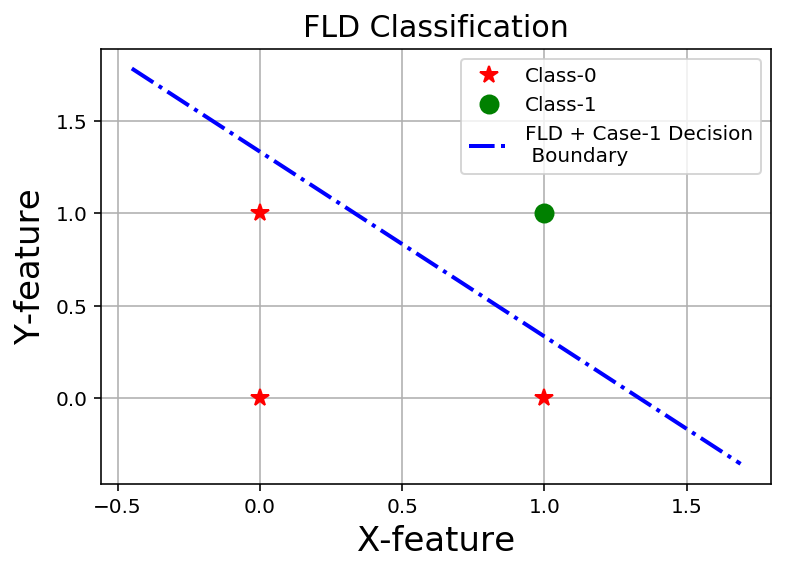

The linear equation for the decision boundary in FLD + case-1:
y=-x + 1.33333333333041


In [29]:

plt.plot(x0,y0,'r*',label='Class-0', markersize=9)
plt.plot(x1,y1,'go',label='Class-1', markersize=9)
plt.grid(True)

# Solving for the Decision Boundary in Case-1 
x=Symbol('x')
y=Symbol('y')

eqn=omega[0]*x+omega[1]*y+0.94280904158

DB_FLD=solve(eqn[0], y)


xplot=np.arange(-0.45, 1.7, 0.01)
plt.plot(xplot, -xplot + 1.3333, 'b-.', linewidth=2, label='FLD + Case-1 Decision\n Boundary')
plt.xlabel('X-feature', fontsize=17)
plt.ylabel('Y-feature', fontsize=17)
# plt.ylim(-0.15,1.5)
plt.title('FLD Classification', fontsize=15)
plt.legend(loc='upper right')
plt.show()

print('The linear equation for the decision boundary in FLD + case-1:\ny=' + str(DB_FLD[0])) 

##  Decision Boundary for FLD data

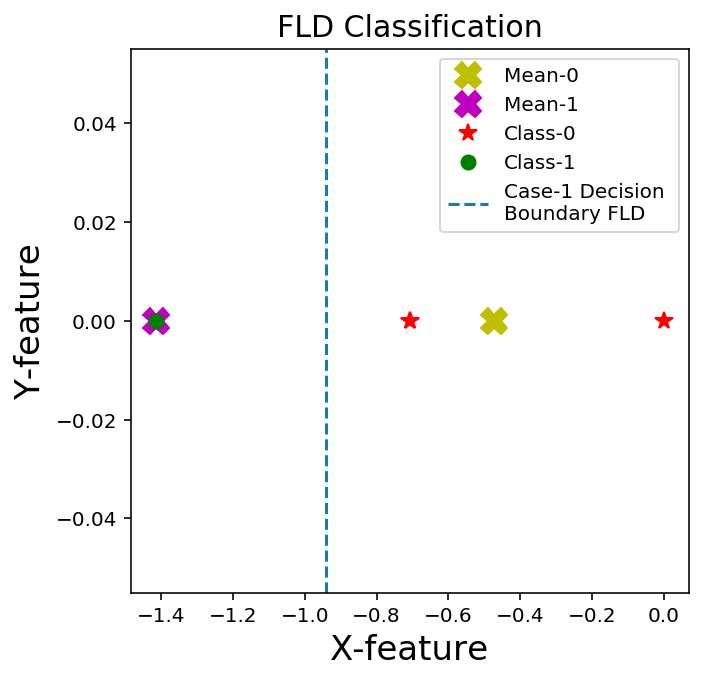

In [34]:
plt.figure(figsize=(5,5))

plt.plot(fmu0, 0,'yX',label='Mean-0', markersize=13)
plt.plot(fmu1, 0,'mX',label='Mean-1', markersize=13)

plt.plot(fX0,np.zeros_like(fX0),'r*',label='Class-0', markersize=9)
plt.plot(fX1,np.zeros_like(fX1),'go',label='Class-1', markersize=7)

xplot=np.arange(-0.25, 1.5, 0.01)
plt.axvline(-0.94, linestyle='--', label='Case-1 Decision \nBoundary FLD')# 'b.', linewidth=1, label='Case-1 Decision Boundary')

plt.xlabel('X-feature', fontsize=17)
plt.ylabel('Y-feature', fontsize=17)
# plt.ylim(-0.15,1.5)
plt.title('FLD Classification', fontsize=15)
plt.legend(loc='upper right')
plt.show()

## 3.3 Perceptron AND gate

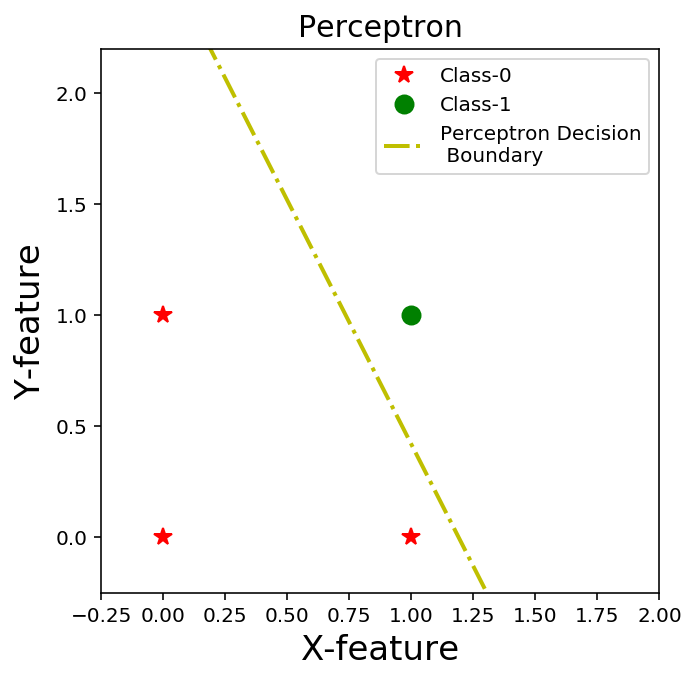

In [42]:
inputt = 2 
w = np.random.random(inputt+1)                    # generate the initial weight vector
x = np.array([[0, 0],  [0, 1],  [1, 0],  [1, 1]]) # the training set (or the inputs)
tr=len(x) 
T = np.array([0,  0,  0,  1])                     # the expected output
z = np.zeros_like(T)

# learning process (training process)
finish = 0 
iteration=0
while finish==0:
    for i in range(tr):
        z[i] = int(np.matmul(w[:inputt].reshape(1,2),x[i,:].reshape(2,1)) >= w[inputt])
        w[:inputt] = w[:inputt] + (T[i]-z[i])* x[i,:] 
        w[inputt] = w[inputt] - (T[i]-z[i])     
    if np.sum(np.abs(z-T)) == 0:
        finish = 1    

    iteration+=1
    if iteration >= 10:
        break

#----------------------------------------------------------------------------------------------------------------------
x0=X0.transpose()[0]
y0=X0.transpose()[1]
x1=X1.transpose()[0]
y1=X1.transpose()[1]

plt.figure(figsize=(5,5))

plt.plot(x0,y0,'r*',label='Class-0', markersize=9)
plt.plot(x1,y1,'go',label='Class-1', markersize=9)

xplot=np.arange(-0.55, 5.9, 0.01)
yplot=((w[2]/w[1])/(-w[2]/w[0]))*xplot + (w[2]/w[1])
plt.plot(xplot, yplot, 'y-.', linewidth=2, label='Perceptron Decision\n Boundary')

plt.xlabel('X-feature', fontsize=17)
plt.ylabel('Y-feature', fontsize=17)
plt.ylim(-0.25,2.2)
plt.xlim(-0.25,2.)
plt.title('Perceptron', fontsize=15)
plt.legend(loc='upper right')
plt.show()

## 3.4 PCA AND gate

In [25]:
X = np.array([[0, 0],  [0, 1],  [1, 0],  [1, 1]]) # Training data
Xtype = np.array([0,  0,  0,  1])                 # Labels

def EstGauss(data):
    mu=np.mean(data, axis=0)
    m,n=data.shape
    sigma=np.zeros((n,n))
    
    for i in range(m):
        sigma = sigma + (data[i] - mu).reshape(n,1).dot((data[i] - mu).reshape(1,n))
        
    sigma=sigma*(1.0/m)
    
    return mu, sigma

mu, sigma=EstGauss(X)

# Eigen decomposition for PCA
w, v = np.linalg.eig(sigma)
# Ordering the eigen values from highest to lowest
idx = w.argsort()[::-1]   
w = w[idx]
v = v[:,idx]

frac=[i/np.sum(w) for i in w]

## Determine the 'm' value for the matrix dimensions.
fraction=0.0
error=1.0-fraction
for i in range(len(frac)):
    if error>=0.51:
        fraction+=frac[i]
        error=1-fraction
        m=i
        
print('Only '+ str(m+1)+ ' features are needed for PCA based on the error rate out of the ' + str(len(w))+' features\n')

pX=np.matmul(v[:m+1,:], X.transpose())  # The multiplication of the principal axes to transform the data.
pX=pX.transpose()

#-----------------------------------------------------------------------------------------------------------------------

classwise=np.insert(pX, 1, Xtype, axis=1)#, axis=0) # Adding the type to the distance
classwise=pd.DataFrame(classwise)
classwise.rename(columns={1:"type"}, inplace=True)
#
pX0=np.array(classwise[classwise['type']==0.0].drop(columns='type')) # Class separated, for FLD and kNN
pX1=np.array(classwise[classwise['type']==1.0].drop(columns='type')) # Class separated, for FLD and kNN

pmu0,psigma0=EstGauss(pX0)
pmu1,psigma1=EstGauss(pX1)

psig=np.sum((psigma0+psigma1).diagonal())/1.0 # Number of features = 5
psigma=psig*(np.identity(1, dtype=float))    # Number of features = 5
psigmadet=np.linalg.det(psigma)
psigmainv=np.linalg.inv(psigma)

# Solving for the Decision Boundary in Case-1 
z=Symbol('z')

Prior=0.5
g00=-0.5*(z-pmu0)*psigmainv*(z-pmu0)-0.5*np.log(psigmadet)+np.log(Prior)
g11=-0.5*(z-pmu1)*psigmainv*(z-pmu1)-0.5*np.log(psigmadet)+np.log(Prior)

DB1=solve(g00-g11, z)

print('The linear equation for the decision boundary in for PCA:\nz='+str(DB1))


Only 1 features are needed for PCA based on the error rate out of the 2 features

The linear equation for the decision boundary in for PCA:
z=[0.666666666666667]


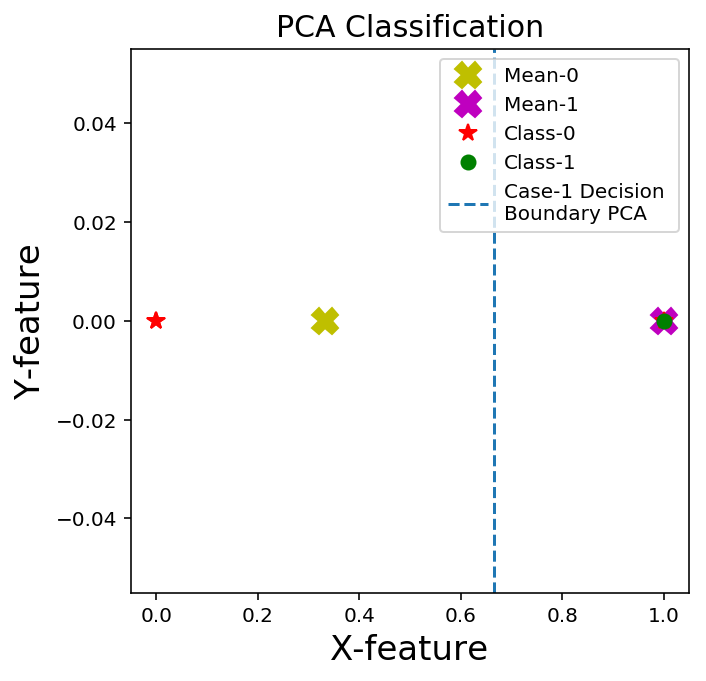

In [711]:

plt.figure(figsize=(5,5))

plt.plot(pmu0, 0,'yX',label='Mean-0', markersize=13)
plt.plot(pmu1, 0,'mX',label='Mean-1', markersize=13)

plt.plot(pX0,np.zeros_like(pX0),'r*',label='Class-0', markersize=9)
plt.plot(pX1,np.zeros_like(pX1),'go',label='Class-1', markersize=7)

xplot=np.arange(-0.25, 1.5, 0.01)
plt.axvline(0.666666666666667, linestyle='--', label='Case-1 Decision \nBoundary PCA')# 'b.', linewidth=1, label='Case-1 Decision Boundary')

plt.xlabel('X-feature', fontsize=17)
plt.ylabel('Y-feature', fontsize=17)
# plt.ylim(-0.15,1.5)
plt.title('PCA Classification', fontsize=15)
plt.legend(loc='upper right')
plt.show()

In [26]:
X = np.array([[0, 0],  [0, 1],  [1, 0],  [1, 1]]) # Training data
Xtype = np.array([0,  0,  0,  1])                 # Labels

def EstGauss(data):
    mu=np.mean(data, axis=0)
    m,n=data.shape
    sigma=np.zeros((n,n))
    
    for i in range(m):
        sigma = sigma + (data[i] - mu).reshape(n,1).dot((data[i] - mu).reshape(1,n))
        
    sigma=sigma*(1.0/m)
    
    return mu, sigma

mu, sigma=EstGauss(X)

# Eigen decomposition for PCA
w, v = np.linalg.eig(sigma)
# Ordering the eigen values from highest to lowest
idx = w.argsort()[::-1]   
w = w[idx]
v = v[:,idx]

frac=[i/np.sum(w) for i in w]

## Determine the 'm' value for the matrix dimensions.
fraction=0.0
error=1.0-fraction
for i in range(len(frac)):
    if error>=0.21:
        fraction+=frac[i]
        error=1-fraction
        m=i
        
print('Only '+ str(m+1)+ ' features are needed for PCA based on the error rate out of the ' + str(len(w))+' features\n')

pX=np.matmul(v[:m+1,:], X.transpose())  # The multiplication of the principal axes to transform the data.
pX=pX.transpose()
#--------------------------------------------------------------------------------------------------------------------------
classwise=np.insert(pX, 2, Xtype, axis=1)#, axis=0) # Adding the type to the distance
classwise=pd.DataFrame(classwise)
classwise.rename(columns={2:"type"}, inplace=True)
#
pX0=np.array(classwise[classwise['type']==0.0].drop(columns='type')) # Class separated, for FLD and kNN
pX1=np.array(classwise[classwise['type']==1.0].drop(columns='type')) # Class separated, for FLD and kNN

pmu0,psigma0=EstGauss(pX0)
pmu1,psigma1=EstGauss(pX1)


psig=(psigma0[0,0]+psigma1[1,1])/2.0
psigma=psig*(np.identity(2, dtype=float))
psigmadet=np.linalg.det(psigma)
psigmainv=np.linalg.inv(psigma)


# Solving for the Decision Boundary in Case-1 
x=Symbol('x')
y=Symbol('y')
zz=np.array([x,y])
z=zz.reshape(1,2)

Prior=0.5
g00=-0.5*(z-pmu0).reshape(1,2).dot(psigmainv).dot((z-pmu0).reshape(2,1))-0.5*np.log(psigmadet)+np.log(Prior)
g11=-0.5*(z-pmu1).reshape(1,2).dot(psigmainv).dot((z-pmu1).reshape(2,1))-0.5*np.log(psigmadet)+np.log(Prior)

DB1=solve(g00[0][0]-g11[0][0], y)

print('The linear equation for the decision boundary in PCA + case-1:\ny='+str(DB1[0])+'\n\n')

Only 2 features are needed for PCA based on the error rate out of the 2 features

The linear equation for the decision boundary in PCA + case-1:
y=-x + 1.33333333333333




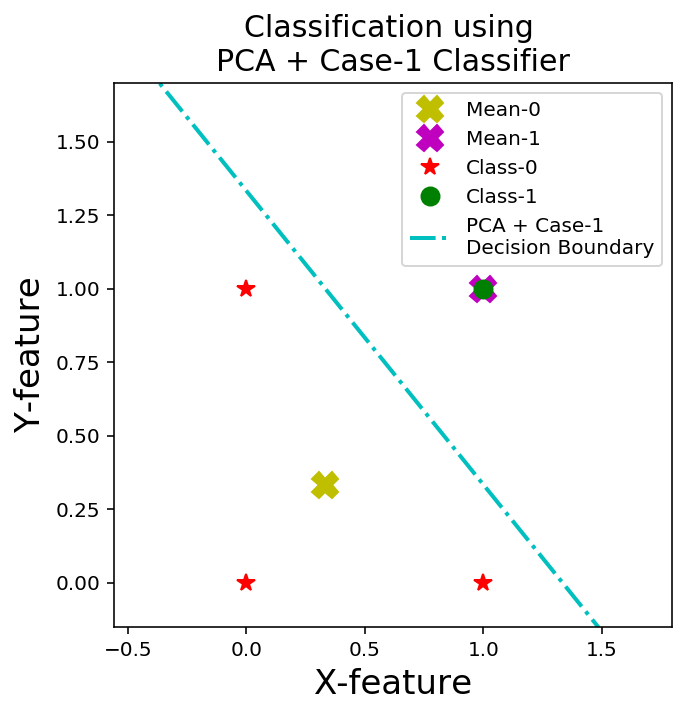

In [717]:
x0=pX0.transpose()[0]
y0=pX0.transpose()[1]
x1=pX1.transpose()[0]
y1=pX1.transpose()[1]

plt.figure(figsize=(5,5))

plt.plot(pmu0[0],pmu0[1],'yX',label='Mean-0', markersize=13)
plt.plot(pmu1[0],pmu1[1],'mX',label='Mean-1', markersize=13)

plt.plot(x0,y0,'r*',label='Class-0', markersize=9)
plt.plot(x1,y1,'go',label='Class-1', markersize=9)

xplot=np.arange(-0.45, 1.7, 0.01)
plt.plot(xplot, -xplot + 1.3333, 'c-.', linewidth=2, label='PCA + Case-1 \nDecision Boundary')

plt.xlabel('X-feature', fontsize=17)
plt.ylabel('Y-feature', fontsize=17)
plt.ylim(-0.15,1.7)
plt.title('Classification using \nPCA + Case-1 Classifier', fontsize=15)
plt.legend(loc='upper right')
plt.show()

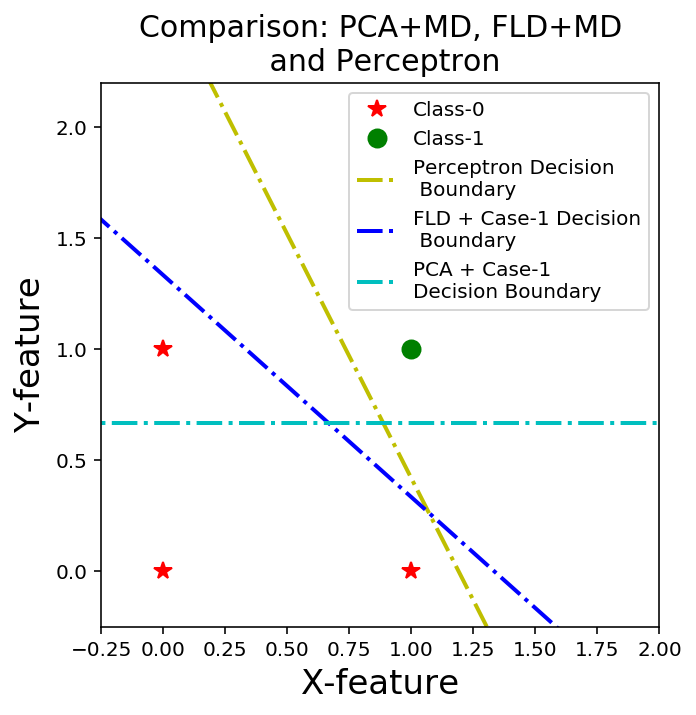

In [46]:
#----------------------------------------------------------------------------------------------------------------------
x0=X0.transpose()[0]
y0=X0.transpose()[1]
x1=X1.transpose()[0]
y1=X1.transpose()[1]

plt.figure(figsize=(5,5))

plt.plot(x0,y0,'r*',label='Class-0', markersize=9)
plt.plot(x1,y1,'go',label='Class-1', markersize=9)

xplot=np.arange(-0.55, 5.9, 0.01)
yplot=((w[2]/w[1])/(-w[2]/w[0]))*xplot + (w[2]/w[1])
plt.plot(xplot, yplot, 'y-.', linewidth=2, label='Perceptron Decision\n Boundary')
plt.plot(xplot, -xplot + 1.3333, 'b-.', linewidth=2, label='FLD + Case-1 Decision\n Boundary')
plt.plot(xplot, np.full_like(xplot, 0.66666), 'c-.', linewidth=2, label='PCA + Case-1 \nDecision Boundary')

plt.xlabel('X-feature', fontsize=17)
plt.ylabel('Y-feature', fontsize=17)
plt.ylim(-0.25,2.2)
plt.xlim(-0.25,2.)
plt.title('Comparison: PCA+MD, FLD+MD\n and Perceptron', fontsize=15)
plt.legend(loc='upper right')
plt.show()